In [1]:
import finesse.virgo
import numpy as np

finesse.init_plotting()

In [2]:
virgo = finesse.virgo.Virgo(maxtem='off')
virgo.make(dc_lock=False)

Adjusting recycling cavity lengths...
Pretuning...
Optimizing demodulation phases...
Optimizing lock gains...
Running RF locks...
Done.


(<Figure size 768x768 with 4 Axes>,
 array([<PolarAxes: title={'center': 'B2_8, phase = -3.466°'}>,
        <PolarAxes: title={'center': 'B2_56, phase = -63.31°'}>,
        <PolarAxes: title={'center': 'B2_6, phase = -9.653°'}>,
        <PolarAxes: title={'center': 'B1p_56, phase = 41.7°'}>],
       dtype=object))

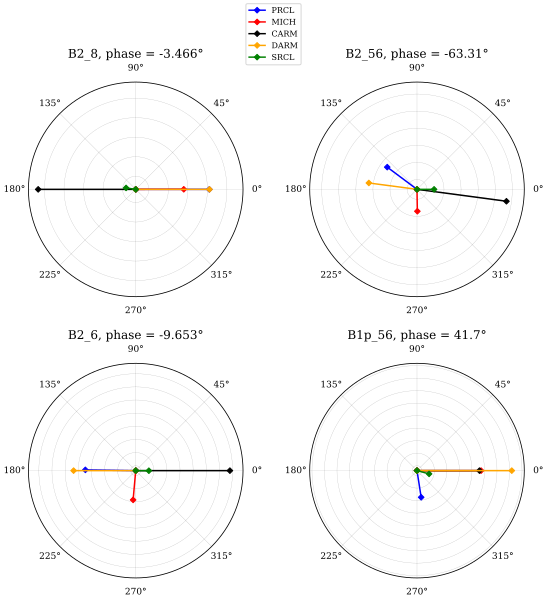

In [3]:
virgo.plot_sensing_matrix()

<PolarAxes: title={'center': 'B2_8, phase = -3.466°'}>

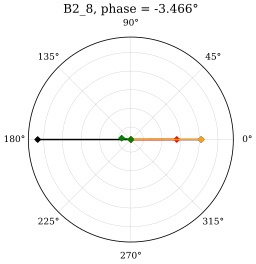

In [4]:
# virgo.plot_sensing_matrix()
virgo.plot_radar('B2_8')

array([<Axes: title={'center': 'DARM TF'}, ylabel='Amplitude [$\\sqrt{W}$]'>,
       <Axes: xlabel='f [Hz]', ylabel='Phase [deg]'>], dtype=object)

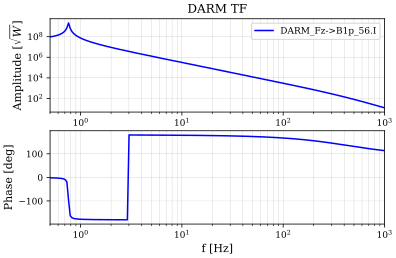

In [5]:
virgo.plot_DARM()

In [6]:
# virgo.sensing_W_to_m(1, 'DARM', 'B2_8_I', inverse=True)
sm = virgo.get_sensing_matrix()

for j,readout in enumerate(virgo.unique_readouts):
    for i,dof in enumerate(virgo.dofs):
        print(dof, readout, np.abs(sm.out[i,j]), np.angle(sm.out[i,j], deg=True))

PRCL B2_8 0.015691167618461576 3.0068715938723656e-08
MICH B2_8 3.7673797707626974e-05 0.08692962063846778
CARM B2_8 4.472587424129941 -179.9999563311012
DARM B2_8 0.01628171369311216 4.463747865762821e-05
SRCL B2_8 4.473022520205368e-09 171.5028172268114
PRCL B2_56 0.003927641881922808 143.2487809713538
MICH B2_56 0.0005021024589476296 -89.05852207256235
CARM B2_56 5.028701957063463 -7.571965503748173
DARM B2_56 0.018306276994435836 172.43385640343868
SRCL B2_56 0.00026242326817468126 3.66135195392497e-06
PRCL B2_6 0.0028783403767915485 179.1300495071425
MICH B2_6 7.262352093075292e-05 -95.10809824391029
CARM B2_6 6.200863577396268 -1.614599167608894e-10
DARM B2_6 0.022573383357934573 -179.99935372286157
SRCL B2_6 4.209347831847849e-06 -0.2998239414218502
PRCL B1p_56 0.0005786814787647041 -81.10295496802499
MICH B1p_56 0.5345202347237494 0.0193737704106377
CARM B1p_56 0.3978246570412376 0.000302138970035869
DARM B1p_56 152.27986805049287 -5.162920748760618e-12
SRCL B1p_56 4.0292615492

In [7]:
# The sensing matrix is calculated by taking the gradient of readouts due to small changes to the DOFs.
sm = virgo.get_sensing_matrix()
sm.display()

# sm.plot(2, 3, dofs=['DARM'], readouts=['B1p_56']);
sm.plot(2, 2, readouts=virgo.unique_readouts)

(<Figure size 576x480 with 4 Axes>,
 array([<PolarAxes: title={'center': 'B2_8'}>,
        <PolarAxes: title={'center': 'B2_56'}>,
        <PolarAxes: title={'center': 'B2_6'}>,
        <PolarAxes: title={'center': 'B1p_56'}>], dtype=object))

In [8]:
sm.out[1,1]

(8.250120931020125e-06-0.0005020346748839961j)

In [9]:
virgo.get_dofs_by_component().keys()

dict_keys(['NE', 'WE', 'NI', 'WI', 'PR', 'SR'])

In [10]:
# convert from W to m...?
virgo.sensing_W_to_m(1, 'DARM', 'B1p_56_I')

1.9408708409016726e-11

In [11]:
virgo.print_tunings()
virgo.set_tunings({
    'NE': 1,
    'WE': 1,
    'NI': 1,
    'WI': 1,
    'PR': 1,
    'SR': 1,
})
virgo.print_tunings()

┌───────────┬────────────┬──────────────┬──────────────┬──────────────┐
│ Optic/DOF │  phi [deg] │ dof.DC [deg] │ Tuning [deg] │  Tuning [pm] │
╞═══════════╪════════════╪══════════════╪══════════════╪══════════════╡
│ NE        │          0 │              │            0 │            0 │
│ WE        │          0 │              │            0 │            0 │
│ NI        │          0 │              │            0 │            0 │
│ WI        │          0 │              │            0 │            0 │
│ PR        │          0 │              │            0 │            0 │
│ SR        │        -90 │              │         -180 │      -532000 │
│ PRCL      │            │            0 │              │              │
│ MICH      │            │            0 │              │              │
│ CARM      │            │            0 │              │              │
│ DARM      │            │            0 │              │              │
│ SRCL      │            │           90 │              │        

In [12]:
# def see_beam(virgo):
#     v2 = virgo.deepcopy()
#     v2.model.parse("""
#     ccd ccd1 PR.p1.o xlim=0.1 ylim=0.1 npts=100 w0_scaled=false
#     """)
#     out = v2.model.run()
#     out.plot()

# virgo.model.modes(maxtem=30)

# virgo.apply_aperture('PR', diameter=1)
# see_beam(virgo)
# virgo.apply_aperture('PR', diameter=0.01)
# see_beam(virgo)